### Here we use the vectors to find groups of words

In [11]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn import cluster
from nltk.cluster import KMeansClusterer
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

### Load words and vectors and insert them into a dataframe

In [3]:
words = np.loadtxt('data/words.txt', dtype='str')
vectors = np.load('data/vectors.npy')

In [8]:
df = pd.DataFrame({"word": words, "vector": list(vectors)})

In [9]:
df.head()

,word,vector
0,putin,"[0.57995605, -2.5773826, -0.66295207, 1.112904..."
1,interview,"[0.34784615, 1.25117, 1.0569727, 1.563584, 1.0..."
2,reveals,"[0.66939026, 0.4327262, -0.67833835, 0.1410036..."
3,a,"[0.2294984, -0.70433664, -0.5706851, -0.264498..."
4,missed,"[0.8596751, 1.3847169, -2.2457545, 0.2523955, ..."


### Kmeans

### We want to define the optimal number of clusters
### Therefore the elbow method is applied using th yellowbrick lib

In [12]:
X = df.vector.to_list()

In [17]:
vecs = np.array(X)

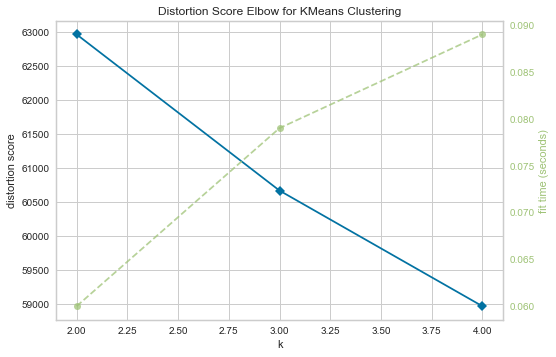

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,5))

visualizer.fit(vecs)     # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [21]:
N_CLUSTERS = 3

kmeans = cluster.KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(vecs)

labels = kmeans.labels_ ## groups list
centroids = kmeans.cluster_centers_
df_kmeans = pd.DataFrame({"word" : df.word.to_list(), "group": labels})

### Testing the groups
### Now we provide some words to see if matches with the groups

In [44]:
politics_check = ['putin', 'trump', 'voters']
entertainment_check = ['season', 'podcast', 'festival']
travel_check = ['flight', 'driving', 'europe']

In [37]:
for word in politics_check:
    print(df_kmeans[df_kmeans['word']==word].iloc[0])

word     putin
group        2
Name: 0, dtype: object
word     trump
group        2
Name: 16, dtype: object
word     voters
group         2
Name: 17, dtype: object


In [45]:
for word in entertainment_check:
    print(df_kmeans[df_kmeans['word']==word].iloc[0])

word     season
group         0
Name: 69, dtype: object
word     podcast
group          0
Name: 75, dtype: object
word     festival
group           0
Name: 196, dtype: object


In [46]:
for word in travel_check:
    print(df_kmeans[df_kmeans['word']==word].iloc[0])

word     flight
group         1
Name: 13, dtype: object
word     driving
group          1
Name: 12, dtype: object
word     europe
group         1
Name: 121, dtype: object
